## Proyecto N°1

### Tasas de Interes
Debemos generar un programa que reciba una tasa de interes anual, que llamaremos "$r$", y que nos permita especificar que tipo de interes queremos. A modo de repaso, los factores de descuento $\text{DF}=\tfrac{\text{PV}}{\text{FV}}$ para cada uno son: 

* Simple: $\text{DF}=\frac{1}{(1+rt)}$
* Compuesto: $\text{DF}=\frac{1}{(1+\frac{r}{p})^{pt}}$
* Continuamente Compuesto: $\text{DF}=\frac{1}{(e^{rt})}$

con $p$ numero de periodos por año y $t$ tiempo en años. Hagamos entonces un programa que grafique este factor a lo largo de diez años para cada uno, entregados los valores correspondientes:

In [1]:
# Imports para graficar y matematica 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Definimos las funciones de factores de descuento
def i_simple(r,t): return 1/(1+r*t)
def i_compuesto(r,p,t): return 1/(1+(r/p))**(p*t)
def i_cont_compuesto(r,t): return 1/(np.e**(r*t))

# Y los ploters
def plot_simple(r):
    ts = np.arange(0,10,0.001)
    dfs = i_simple(r,ts)
    fig, ax = plt.subplots()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    ax_dfs = ax.plot(ts, dfs, color='purple', label='r = {}'.format(r))
    ax.legend(handles=ax_dfs, prop={'size': 13})
    ax.set_title('Factor de Descuento para Interes Simple')
    ax.set_ylabel('Factor de Descuento DF')
    ax.set_xlabel('Tiempo en años t')
    plt.show()

def plot_compuesto(r,p):
    ts = np.arange(0,10,0.001)
    dfs = i_compuesto(r,p,ts)
    fig, ax = plt.subplots()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    ax_dfs = ax.plot(ts, dfs, color='purple', label='r = {}, p = {}'.format(r,p))
    ax.legend(handles=ax_dfs, prop={'size': 13})
    ax.set_title('Factor de Descuento para Interes Compuesto')
    ax.set_ylabel('Factor de Descuento DF')
    ax.set_xlabel('Tiempo en años t')
    plt.show()

def plot_cont_compuesto(r):
    ts = np.arange(0,10,0.001)
    dfs = i_cont_compuesto(r,ts)
    fig, ax = plt.subplots()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    ax_dfs = ax.plot(ts, dfs, color='blue', label='r = {}'.format(r))
    ax.legend(handles=ax_dfs, prop={'size': 13})
    ax.set_title('Factor de Descuento para Interes Continuamente Compuesto')
    ax.set_ylabel('Factor de Descuento DF')
    ax.set_xlabel('Tiempo en años t')
    plt.show()

# función principal del programa 
def main():
    print('Por favor seleccione el tipo de interes que desea simular:')
    print('1) Interes Simple')
    print('2) Interes Compuesto')
    print('3) Interes Continuamente Compuesto')
    x = input('')
    if x not in ['1','2','3']: 
        print('Selección invalida... Pruebe de nuevo :P')
        main()
        return
    while True:
            try:
                r = float(input('Digite la taza deseada: '))
                break
            except ValueError:
                print("Este valor debe ser un numero! Pruebe de nuevo :P")
                pass
    if x == '1' : plot_simple(r) 
    if x =='2':
        while True:
            try:
                p = int(input('Digite el numero de particiones x año: '))
                break
            except ValueError:
                print("Este valor debe ser un numero entero! Pruebe de nuevo :P")
                pass
        plot_compuesto(r,p)
    if x == '3': plot_cont_compuesto(r)
    while True:
        vuelta = input('Quiere simular otro DF? y/n: ')
        if vuelta not in ['y','n']: 
            print('Selección invalida... Pruebe de nuevo :P')
            continue
        elif vuelta == 'n': 
            print('Understandable, have a nice day :)')
        elif vuelta == 'y': 
            main()
        return

Por favor seleccione el tipo de interes que desea simular:
1) Interes Simple
2) Interes Compuesto
3) Interes Continuamente Compuesto
3
Digite la taza deseada: 17


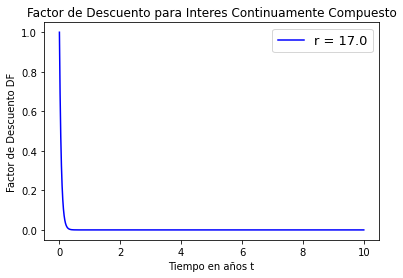

Quiere simular otro DF? y/n: y
Por favor seleccione el tipo de interes que desea simular:
1) Interes Simple
2) Interes Compuesto
3) Interes Continuamente Compuesto
1
Digite la taza deseada: 17


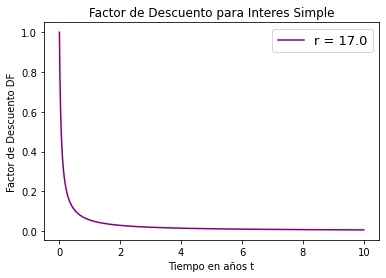

Quiere simular otro DF? y/n: y
Por favor seleccione el tipo de interes que desea simular:
1) Interes Simple
2) Interes Compuesto
3) Interes Continuamente Compuesto
2
Digite la taza deseada: 0.17
Digite el numero de particiones x año: 12


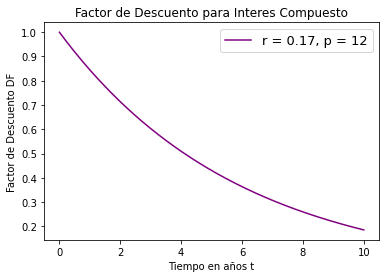

Quiere simular otro DF? y/n: n
Understandable, have a nice day :)


In [3]:
# Para correr el programa ejecute esta celda :)
main()

### Puntos Forward

Como nos dice el enunciado, los puntos forward vienen dados por la expresión

$$\text{PF}_\text{T}(t)=\text{F}_\text{T}(t)-S(t)$$, 

donde $\text{F}_\text{T}(t)$ es el precio del dolar a un plazo $T-t$ y $S(t)$ es el precio spot en $t$. Como vimos en clases, 

$$F=S(t)e^{(r_{\text{CLP}}-r_{\text{USD}})}e^{(T-t)}$ $\quad\longrightarrow\quad$ $\text{PF}_\text{T}(t)=s(t)\left(e^{(r_{\text{CLP}}-r_{\text{USD}})}e^{(T-t)}-1\right)$$, 

donde $r_{\text{CLP}}$ y $r_{\text{USD}}$ son las tasas en pesos y dolares, respectivamente. Despejando $r_{\text{USD}}$ de la igualdad anterior obtenemos; 

$$r_{\text{USD}}=r_{\text{CLP}}-\frac{1}{(T-t)}\ln{\left(\frac{\text{PF}_\text{T}(t)}{S(t)}+1\right)}$$.

Programemos un script que sea capaz de obtener la tasa en dolares a partir de los parametros especificados.


In [10]:
# Definimos la función de taza en USD
def r_usd(r_clp, pf, s, T, t): return r_clp-(1/(T-t))*np.log(pf/s+1)

# Escribimos nuestro programa principal
def main2():
    while True:
        try:
            r_clp = float(input('Digite la tasa en pesos: '))
            pf = float(input('Digite los puntos forward: '))
            s = float(input('Digite la cantidad de capital inicial: '))
            T = float(input('Digite la fecha de madurez en años: '))
            t = float(input('Digite la fecha actual en años: '))
            break
        except ValueError: 
            print('NUMEROS MARIE! NUMEROS!')
            print('Intente de nuevo... :P')
            continue
    r = r_usd(r_clp,pf,s,T,t)
    print('La tasa del dolar resultante sería: r={:.4f}'.format(r))
    while True:
        vuelta = input('Quiere simular otra tasa? y/n: ')
        if vuelta not in ['y','n']: 
            print('Selección invalida... Pruebe de nuevo :P')
            continue
        elif vuelta == 'n': 
            print('Understandable, have a nice day :)')
        elif vuelta == 'y': 
            main2()
        return

In [8]:
main2()

Digite la tasa en pesos: 0.3
Digite los puntos forward: 10
Digite la cantidad de capital inicial: 1000
Digite la fecha de madurez en años: 10
Digite la fecha actual en años: 1
La tasa del dolar resultante sería: $r=0.2989$
